In [14]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
import time
import csv
import os
import numpy as np

In [15]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions
# mp_hands = mp.solutions.hands

# Test Detection & Make Landmark

In [3]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)

# Initiate holistic model
prevTime = 0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        ###
        initialTime = time.time()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        ### First point
        firstTime = time.time() - initialTime
        cv2.putText(image, f'1: {round(firstTime,3)}', (20,100), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        ### Seocnd point
        secondTime = time.time() - initialTime
        cv2.putText(image, f'2: {round(secondTime,3)}', (20,150), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        # Calculate FPS
        currTime = time.time()
        fps = 1 / (currTime - prevTime)
        prevTime = currTime
        cv2.putText(image, f'FPS: {round(fps,3)}', (20,40), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [3]:
# num_pose_coords = len(results.pose_landmarks.landmark)
# num_pose_coords

In [16]:
num_pose_coords = 22
num_pose_coords

22

In [17]:
# "LEFT" hand coords
# num_left_hand_coords = len(results.right_hand_landmarks.landmark)
num_left_hand_coords = 20
num_left_hand_coords

20

In [18]:
# "RIGHT" hand coords
# num_right_hand_coords = len(results.left_hand_landmarks.landmark)
num_right_hand_coords = 20
num_right_hand_coords

20

In [19]:
num_hand_coords = num_right_hand_coords + num_left_hand_coords
num_hand_coords

40

In [20]:
num_pose_hand_coords = num_pose_coords + num_right_hand_coords + num_left_hand_coords
num_pose_hand_coords

62

In [21]:
# num_face_coords = len(results.face_landmarks.landmark)
num_face_coords = 467
num_face_coords

467

In [22]:
# pose_hand_landmarks = ['class']
# for val in range(1, num_pose_hand_coords+1):
#     pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [23]:
face_landmarks = ['class']
for val in range(1, num_face_coords+1):
    face_landmarks += ['x{}'.format(val), 'y{}'.format(val)]

In [24]:
# pose_landmarks = ['class']
# for val in range(1, num_pose_coords+1):
#     pose_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [25]:
# hand_landmarks = ['class']
# for val in range(1, num_hand_coords+1):
#     hand_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

In [26]:
pose_hand_landmarks = ['class']
for val in range(1, num_pose_coords+1):
    pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val)]
for val in range(num_pose_coords+1, num_pose_coords+num_hand_coords+1):
    pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val)]

# Set the Directory Path

In [27]:
path_rawData = ".//rawData"
path_model = ".//model"

# Pose & Hand Recording

In [60]:
# ## New file
# pose_hand_file = '//211103pose_hand_sample_JY_KR.csv'
# with open(path_rawData + pose_hand_file, mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(pose_hand_landmarks)

In [72]:
pose_hand_file = '//211102pose_hand_sample.csv'

In [99]:
class_name = "16"

In [100]:
### Revise one
### Remove unnecessary value & Hand Coordinate Move

start = False
waiting = False
checker = False
waiting_time = time.time()
max_time_end = time.time()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        if start:
            # Export coordinates
            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[pose[i].x-pose[0].x, pose[i].y-pose[0].y] 
                                          for i in range(1, num_pose_coords+1)]).flatten())
                try:
                    # Extract "RIGHT" Hand lanmarks
                    righthand = results.left_hand_landmarks.landmark
                    righthand_row = list(np.array([[righthand[i].x - righthand[0].x, righthand[i].y - righthand[0].y]
                                                   for i in range(1,num_right_hand_coords+1)]).flatten())
                except:
                    righthand_row = [0 for i in range(num_right_hand_coords*2)]

                try:
                    # Extract "LEFT" Hand lanmarks
                    lefthand = results.right_hand_landmarks.landmark
                    lefthand_row = list(np.array([[lefthand[i].x - lefthand[0].x, lefthand[i].y - lefthand[0].y]
                                                  for i in range(1,num_left_hand_coords+1)]).flatten())
                except:
                    lefthand_row = [0 for i in range(num_left_hand_coords*2)]
                        
                
                # Concate rows
                row = pose_row + righthand_row + lefthand_row

                # Append class name 
                row.insert(0, class_name)
            

                # Export to CSV
                with open(path_rawData + pose_hand_file, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
            except:
                pass
                        
        cv2.imshow('Gather Pose Data', image)
        
        # r키를 눌러서 녹화 시작 - 20초간 녹화
        if cv2.waitKey(10) & 0xFF == ord('r'):
            print("Wait 3 seconds")
            waiting_time = time.time() + (3)
            checker = True
            
        if time.time() > waiting_time and checker == True:
            waiting = True
            checker = False
                
        if waiting:
            print("Recording Start!")
            max_time_end = time.time() + (30)
            start = True
            waiting = False
        
        # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
        if time.time() > max_time_end and start == True:
            start = False
            break
        
        # q키를 눌러서 강제로 녹화 종료 가능
        if cv2.waitKey(10) & 0xFF == ord('q'):
            start = False
            break

cap.release()
cv2.destroyAllWindows()

Wait 3 seconds
Recording Start!


In [32]:
# ### Revise one

# start = False
# waiting = False
# checker = False
# waiting_time = time.time()
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
        
#         if start:
#             # Export coordinates
#             try:
#                 # Extract Pose landmarks
#                 pose = results.pose_landmarks.landmark
#                 pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten()) 
                
#                 try:
#                     # Extract "RIGHT" Hand lanmarks
#                     righthand = results.left_hand_landmarks.landmark
#                     righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in righthand]).flatten())
#                 except:
#                     righthand_row = [0 for i in range(num_right_hand_coords*3)]

#                 try:
#                     # Extract "LEFT" Hand lanmarks
#                     lefthand = results.right_hand_landmarks.landmark
#                     lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lefthand]).flatten())
#                 except:
#                     lefthand_row = [0 for i in range(num_left_hand_coords*3)]
                        
                
#                 # Concate rows
#                 row = pose_row + righthand_row + lefthand_row

#                 # Append class name 
#                 row.insert(0, class_name)
            

#                 # Export to CSV
#                 with open(path_rawData + pose_hand_file, mode='a', newline='') as f:
#                     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                     csv_writer.writerow(row)
#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Wait 3 seconds")
#             waiting_time = time.time() + (3)
#             checker = True
            
#         if time.time() > waiting_time and checker == True:
#             waiting = True
#             checker = False
                
#         if waiting:
#             print("Recording Start!")
#             max_time_end = time.time() + (10)
#             start = True
#             waiting = False
        
#         # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

In [36]:
# ### 손 하나가 안보이면 예외처리가 되는 에러

# start = False
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
# #         # 1. Draw face landmarks
# #         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
# #                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
# #                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
# #                                  )
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
        
#         if start:
#             # Export coordinates
#             try:
#                 # Extract Pose landmarks
#                 pose = results.pose_landmarks.landmark
#                 pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

# #                 # Extract Face landmarks
# #                 face = results.face_landmarks.landmark
# #                 face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
                
#                 # Extract "RIGHT" Hand lanmarks
#                 righthand = results.left_hand_landmarks.landmark
#                 righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in righthand]).flatten())
                
#                 # Extract "LEFT" Hand lanmarks
#                 lefthand = results.right_hand_landmarks.landmark
#                 lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in lefthand]).flatten())
                
#                 # Concate rows
#                 row = pose_row + righthand_row + lefthand_row
 
#                 # Append class name 
#                 row.insert(0, class_name)
                
#                 # Export to CSV
#                 with open('pose_hand_sample.csv', mode='a', newline='') as f:
#                     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                     csv_writer.writerow(row)

#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Recording Start!")
#             max_time_end = time.time() + (5)
#             start = True
        
#         # r키를 눌러서 녹화 시작 후 15초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

Recording Start!


# Hand Recording

In [73]:
# hand_file = '//210910hand_sample.csv'
# with open(path_rawData+fileName, mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(hand_landmarks)

In [74]:
# class_name = "0"

In [26]:
# ### Revise one

# start = False
# waiting = False
# checker = False
# right = True
# left = True

# waiting_time = time.time()
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )
        
# #         righthand = results.left_hand_landmarks.landmark
# #         for landmark in righthand:
# #             print(landmark)
        
#         if start:
#             # Export coordinates
#             try:
                
#                 try:
#                     # Extract "RIGHT" Hand lanmarks
#                     righthand = results.left_hand_landmarks.landmark
#                     righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in righthand]).flatten())
#                     right = True
#                 except:
#                     righthand_row = [0 for i in range(num_right_hand_coords*3)]
#                     right = False

#                 try:
#                     # Extract "LEFT" Hand lanmarks
#                     lefthand = results.right_hand_landmarks.landmark
#                     lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lefthand]).flatten())
#                     left = True
#                 except:
#                     lefthand_row = [0 for i in range(num_left_hand_coords*3)]
#                     left = False
                
#                 if right != False or left != False:
#                     # Concate rows
#                     row = righthand_row + lefthand_row

#                     # Append class name 
#                     row.insert(0, class_name)


#                     # Export to CSV
#                     with open(path_rawData + hand_file, mode='a', newline='') as f:
#                         csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                         csv_writer.writerow(row)
                        
#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Wait 3 seconds")
#             waiting_time = time.time() + (3)
#             checker = True
            
#         if time.time() > waiting_time and checker == True:
#             waiting = True
#             checker = False
                
#         if waiting:
#             print("Recording Start!")
#             max_time_end = time.time() + (10)
#             start = True
#             waiting = False
        
#         # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

# Face Recording

In [52]:
# ## New file
# face_file = '//211103face_sample_JY_KR.csv'
# with open(path_rawData + face_file, mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(face_landmarks)

In [101]:
face_file = '//211102face_sample.csv'

In [108]:
class_name = "2"

In [109]:
start = False
max_time_end = time.time()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        if start:
            # Export coordinates
            try:
                # Extract Face landmarks
                face = results.face_landmarks.landmark
#                 face_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in face]).flatten())            
                face_row = list(np.array([[face[i].x-face[0].x, face[i].y-face[0].y] 
                                          for i in range(1, num_face_coords+1)]).flatten())
                # Concate rows
                row = face_row

                # Append class name 
                row.insert(0, class_name)

                # Export to CSV
                with open(path_rawData + face_file, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)

            except:
                pass
                        
        cv2.imshow('Gather Pose Data', image)
        
        # r키를 눌러서 녹화 시작 - 20초간 녹화
        if cv2.waitKey(10) & 0xFF == ord('r'):
            print("Recording Start!")
            max_time_end = time.time() + (30)
            start = True
        
        # r키를 눌러서 녹화 시작 후 15초 후에 녹화 종료
        if time.time() > max_time_end and start == True:
            start = False
            break
        
        # q키를 눌러서 강제로 녹화 종료 가능
        if cv2.waitKey(10) & 0xFF == ord('q'):
            start = False
            break

cap.release()
cv2.destroyAllWindows()

Recording Start!


# Read in Collected Data and Preprocess

In [28]:
# Read in Collected Data and Process
import pandas as pd
from sklearn.model_selection import train_test_split

# Train Machine Learning Classification Model
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluate and Serialize Model
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [97]:
pose_hand_df = pd.read_csv(path_rawData + '//FINAL_pose_hand_sample.csv')
face_df = pd.read_csv(path_rawData + '//FINAL_face_sample.csv')

In [98]:
# Remove NaN Value
pose_hand_df = pose_hand_df.dropna(axis=0)
face_df = face_df.dropna(axis=0)

In [138]:
pose_hand_df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62
0,0,0.017115,-0.044480,0.030187,-0.042889,0.040033,-0.040399,-0.018198,-0.045264,-0.030378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.017054,-0.042933,0.030162,-0.041534,0.039909,-0.039268,-0.018420,-0.044005,-0.030583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.016958,-0.041713,0.030030,-0.040425,0.039648,-0.038265,-0.018617,-0.043032,-0.030728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.016951,-0.041077,0.030052,-0.039841,0.039633,-0.037771,-0.018633,-0.042519,-0.030742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.016943,-0.040886,0.030079,-0.039684,0.039631,-0.037657,-0.018666,-0.042373,-0.030774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
pose_hand_df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62
77271,16,0.020798,-0.051449,0.031726,-0.049637,0.045510,-0.047634,-0.017685,-0.055913,-0.031495,...,-0.193182,-0.060257,-0.073272,0.051618,-0.117638,0.047839,-0.143994,0.048148,-0.168682,0.037178
77272,16,0.020862,-0.051242,0.031786,-0.049417,0.045587,-0.047344,-0.017623,-0.055767,-0.031443,...,-0.165687,-0.114491,-0.065254,0.015701,-0.107849,0.013595,-0.134391,-0.003104,-0.157389,-0.026795
77273,16,0.020823,-0.051316,0.031742,-0.049501,0.045605,-0.047442,-0.017717,-0.055764,-0.031563,...,-0.106748,-0.066153,-0.036603,0.030814,-0.068374,0.030587,-0.088559,0.019511,-0.105481,0.002263
77274,16,0.020550,-0.051565,0.031475,-0.049742,0.045355,-0.047672,-0.018040,-0.056012,-0.031946,...,-0.050880,-0.164164,-0.038107,-0.001774,-0.048505,-0.014285,-0.052546,-0.027951,-0.055490,-0.046310
77275,16,0.020620,-0.051532,0.031611,-0.049704,0.045208,-0.047623,-0.017852,-0.056013,-0.031595,...,0.088270,0.009117,0.011662,0.016760,0.027588,0.030585,0.039318,0.035390,0.051909,0.039618


In [101]:
face_df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
0,0,0.001782,-0.052010,0.000543,-0.035174,-0.005677,-0.097104,0.001867,-0.066860,0.001556,...,0.019778,-0.132457,0.015420,-0.128881,0.013095,-0.126562,0.055480,-0.142176,0.059348,-0.148753
1,0,0.001732,-0.051512,0.000466,-0.034823,-0.005937,-0.096690,0.001772,-0.066379,0.001371,...,0.018992,-0.131864,0.014750,-0.128349,0.012510,-0.126074,0.054355,-0.140971,0.058244,-0.147559
2,0,0.001272,-0.051704,0.000305,-0.035036,-0.006291,-0.096848,0.001265,-0.066542,0.000913,...,0.019190,-0.132448,0.014858,-0.128895,0.012536,-0.126586,0.054893,-0.142013,0.058791,-0.148553
3,0,0.001628,-0.051985,0.000364,-0.035017,-0.006137,-0.096837,0.001660,-0.066821,0.001246,...,0.019014,-0.131324,0.014705,-0.127876,0.012439,-0.125681,0.054632,-0.140213,0.058507,-0.146737
4,0,0.001421,-0.051550,0.000318,-0.035091,-0.006189,-0.096762,0.001444,-0.066341,0.001085,...,0.019268,-0.132763,0.014913,-0.129159,0.012597,-0.126777,0.054854,-0.141952,0.058776,-0.148627


In [102]:
face_df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
13436,2,-0.000149,-0.045954,-0.000346,-0.033137,-0.006234,-0.095264,-0.000061,-0.060691,-0.000042,...,0.018202,-0.133833,0.014318,-0.130425,0.012208,-0.127845,0.051403,-0.138366,0.055357,-0.145912
13437,2,-0.000350,-0.046965,-0.000484,-0.033804,-0.006573,-0.095875,-0.000295,-0.061663,-0.000315,...,0.017733,-0.134134,0.013885,-0.130742,0.011810,-0.128201,0.050838,-0.138411,0.054861,-0.146141
13438,2,-0.000422,-0.046598,-0.000375,-0.033397,-0.006513,-0.096138,-0.000394,-0.061482,-0.000348,...,0.018391,-0.134347,0.014427,-0.130965,0.012282,-0.128430,0.051790,-0.138786,0.055769,-0.146309
13439,2,-0.000658,-0.046650,-0.000568,-0.033228,-0.006888,-0.095873,-0.000703,-0.061543,-0.000750,...,0.017262,-0.133627,0.013364,-0.130332,0.011289,-0.127906,0.050218,-0.138632,0.054085,-0.145913
13440,2,-0.000251,-0.046868,-0.000410,-0.033649,-0.006509,-0.095634,-0.000220,-0.061611,-0.000256,...,0.017741,-0.133655,0.013828,-0.130203,0.011747,-0.127653,0.050969,-0.138664,0.054845,-0.145976


In [103]:
pose_hand_X = pose_hand_df.drop('class', axis=1) # features
pose_hand_y = pose_hand_df['class'] # target value
face_X = face_df.drop('class', axis=1) # features
face_y = face_df['class'] # target value

# Model Evaluation

### Preprocessing for Hold-out Validation

In [115]:
# Data split
size = 0.2
pose_hand_X_train, pose_hand_X_test, pose_hand_y_train, pose_hand_y_test = train_test_split(pose_hand_X, pose_hand_y, stratify=pose_hand_y, test_size=size, random_state=1234)
face_X_train, face_X_test, face_y_train, face_y_test = train_test_split(face_X, face_y, stratify=face_y, test_size=size, random_state=1234)

In [140]:
pose_hand_y_train.value_counts()

5     4125
6     3825
0     3603
1     3600
3     3600
12    3599
7     3599
16    3599
4     3598
14    3598
13    3598
2     3598
10    3597
11    3594
8     3593
9     3592
15    3502
Name: class, dtype: int64

In [141]:
pose_hand_y_test.value_counts()

5     1032
6      957
0      901
3      900
14     900
13     900
1      900
16     900
12     900
7      900
10     899
2      899
4      899
11     898
9      898
8      898
15     875
Name: class, dtype: int64

In [142]:
face_y_train.value_counts()

2    3586
0    3586
1    3580
Name: class, dtype: int64

In [143]:
face_y_test.value_counts()

2    897
0    897
1    895
Name: class, dtype: int64

### Hold-out validation for pose_hand

In [144]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(StandardScaler(), SVC()),
}

In [145]:
pose_hand_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(pose_hand_X_train, pose_hand_y_train)
    pose_hand_fit_models[algo] = model

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [146]:
pose_hand_fit_models['sv'].predict(pose_hand_X_test)

array([ 5,  2, 11, ...,  0, 10,  4], dtype=int64)

In [147]:
# Holdout-validation for pose_hand_fit_models
for algo, model in pose_hand_fit_models.items():
    pred = model.predict(pose_hand_X_test)
    print(algo, accuracy_score(pose_hand_y_test, pred))

lr 0.9992883022774327
rc 0.9830486542443064
rf 0.9995471014492754
gb 0.9990942028985508
sv 0.9988354037267081


### Hold-out validation for face

In [110]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(StandardScaler(), SVC()),
}

In [122]:
face_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(face_X_train, face_y_train)
    face_fit_models[algo] = model

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
face_fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'sv': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

In [124]:
# Holdout-validation for face_fit_models
for algo, model in face_fit_models.items():
    pred = model.predict(face_X_test)
    print(algo, accuracy_score(face_y_test, pred))

lr 0.9200446262551134
rc 0.9308293045741911
rf 0.9895872071402008
gb 0.9680178505020454
sv 0.9624395686128673


### Cross-validation for pose_hand & face

In [112]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(StandardScaler(), SVC()),
}

In [113]:
# cross-vadliation for pose_hand_model
from sklearn import model_selection
for algo, pipeline in pipelines.items():
    scores = model_selection.cross_val_score(pipeline, pose_hand_X, pose_hand_y, cv=5)
    print(algo)
    print(scores)
    print(scores.mean())

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

lr
[0.92598344 0.94849563 0.99100615 0.9984471  0.99864122]
0.9725147074288338
rc
[0.95930383 0.94694274 0.99437075 1.         0.99948237]
0.9800199378346136
rf
[0.95658644 0.92449046 0.97955354 0.98990618 0.96797153]
0.9637016294216899
gb
[0.88114648 0.90119702 0.98104173 0.98557101 0.96480104]
0.942751457179161
sv
[0.94390528 0.95088968 0.98350049 0.99890003 0.99540602]
0.9745202988640633


In [114]:
# cross-validation for face_model
from sklearn import model_selection
for algo, pipeline in pipelines.items():
    scores = model_selection.cross_val_score(pipeline, face_X, face_y, cv=5)
    print(algo)
    print(scores)
    print(scores.mean())

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

lr
[0.81442916 0.85119048 0.70796131 0.92261905 0.75669643]
0.8105792835449538
rc
[0.77835627 0.72916667 0.56547619 0.84263393 0.60267857]
0.7036623246825691
rf
[0.71959836 0.77008929 0.79352679 0.87946429 0.75223214]
0.7829821727407957
gb
[0.74005206 0.77901786 0.73623512 0.85751488 0.73809524]
0.7701830318404789
sv
[0.74488657 0.73772321 0.75483631 0.87574405 0.80729167]
0.7840963626060315


# Model Export

In [154]:
# Export pose_hand_fit_models
modelName = '//211104pose_hand.pkl'
with open(path_model + modelName, 'wb') as f:
    pickle.dump(pose_hand_fit_models['lr'], f)

In [128]:
# Export face_fit_models
modelName = '//211104face.pkl'
with open(path_model + modelName, 'wb') as f:
    pickle.dump(face_fit_models['lr'], f)

# Test DEMO

In [155]:
#######################
### Make Code Clear ###
#######################

mp_holistic = mp.solutions.holistic  # Mediapipe Solutions

pose_hand_model = "//211104pose_hand.pkl"
face_model = "//211104face.pkl"

# Load Model
with open(path_model + pose_hand_model, 'rb') as f:
    pose_hand_model = pickle.load(f)
with open(path_model + face_model, 'rb') as f:
    face_model = pickle.load(f)


cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
prevTime = 0
readData = True

# def sample(x,y):
#     return x,y

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Start point: Timer for make dataframe
        if readData:
            beginTime = time.time()
            readData = False
        
        ### Start point: Timer for Debugging
        initialTime = time.time()

        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False        
        
        # Make Detectionsq
        results = holistic.process(image)
                
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # --------------------------------------------------------------------------------------------- #
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # --------------------------------------------------------------------------------------------- #
        
        
        # Export Pose-Hand coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[pose[i].x-pose[0].x, pose[i].y-pose[0].y] 
                          for i in range(1, num_pose_coords+1)]).flatten())
            # Extract "RIGHT" Hand lanmarks
            try:
                righthand = results.left_hand_landmarks.landmark
                righthand_row = list(np.array([[righthand[i].x - righthand[0].x, righthand[i].y - righthand[0].y]
                               for i in range(1,num_right_hand_coords+1)]).flatten())
            except:
                righthand_row = [0 for i in range(num_right_hand_coords*2)]

            # Extract "LEFT" Hand lanmarks
            try:
                lefthand = results.right_hand_landmarks.landmark
                lefthand_row = list(np.array([[lefthand[i].x - lefthand[0].x, lefthand[i].y - lefthand[0].y]
                                                  for i in range(1,num_left_hand_coords+1)]).flatten())
            except:
                lefthand_row = [0 for i in range(num_left_hand_coords*2)]
            
            # Concate rows
            pose_hand_row = pose_row+righthand_row+lefthand_row
            
            # Make Prediction
            pose_hand_class = pose_hand_model.predict([pose_hand_row])[0]
            pose_hand_prob = pose_hand_model.predict_proba([pose_hand_row])[0]
                     
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(pose_hand_class)
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(pose_hand_prob[np.argmax(pose_hand_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
            
        # Export Face coordinates
        try:
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[face[i].x - face[0].x, face[i].y - face[0].y]
                                                  for i in range(1,num_face_coords+1)]).flatten())
            
            
            # Make Prediction
            face_class = face_model.predict([face_row])[0]
            face_prob = face_model.predict_proba([face_row])[0]
#             print(face_class)
#             print(face_prob)
            
            
            # Get status box
            cv2.rectangle(image, (250,0), (500, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (345,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(face_class)
                        , (340,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (265,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(face_prob[np.argmax(face_prob)],2))
                        , (260,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
        
        # Calculate FPS
        currTime = time.time()
        fps = 1 / (currTime - prevTime)
        prevTime = currTime
        cv2.putText(image, f'FPS: {round(fps,3)}', (20,100), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Virtual Cam DEMO

In [202]:
# Load Pose_Hand_Images with Array Test
from PIL import Image
import os, os.path

pose_hand_imgs = []
path = "./effect/sample/"
fileType = '.png'
fileList = os.listdir(path)
fileList.sort()
print(fileList)
for i in range(0,20):
    imgs.append(Image.open(path+str(i)+fileType))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './effect/sample/'

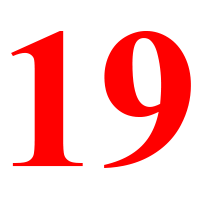

In [330]:
imgs[19]

In [ ]:
# VirtualCam DEMO